<a href="https://colab.research.google.com/github/anupsk5053/DL-Practice/blob/main/imdb_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imdb review classification

In [3]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from tensorflow.keras.datasets import imdb

In [54]:
(train_data , train_labels) , (test_data , test_labels) = imdb.load_data(num_words=10000)

In [55]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [56]:
len(train_data[0])

218

In [57]:
train_labels[0]

1

In [58]:
# 0 is negative and 1 is posiive revirews

In [59]:
#decoding reviews
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [ (value,key) for (key,value) in word_index.items()]
)
decoded_review = " ".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]]
)

In [60]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [61]:
decoded_review = " ".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]]
)

In [62]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [63]:
import numpy as np

In [64]:
def vectorize_sequences(sequences, dimensions =10000):
  results = np.zeros((len(sequences),dimensions))
  for i, sequence in enumerate(sequences) :
    for j in sequence:
      results[i,j] = 1.
  return results


In [65]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [66]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [67]:
len(x_test[6])

10000

In [68]:
#vectorize the lables as well
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [69]:
y_train[0]

1.0

In [70]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [71]:
len(y_test)

25000

In [72]:
len(x_train)

25000

In [73]:
#Buildign the model

In [74]:
from tensorflow import keras
from tensorflow.keras import layers

In [75]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid") #sigmoid is used for binary and softmanx for multple classes
])

In [76]:
from keras.mixed_precision import loss_scale_optimizer
#compling the model
model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])


In [77]:
model.summary()

ValueError: ignored

In [78]:
#setting aside for valudation

In [79]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [88]:
history = model.fit (partial_x_train,
                     partial_y_train,
                     epochs =5,
                     batch_size = 512,
                     validation_data = (x_val,y_val))

Epoch 1/5
30/30 [==============================] - 3s 84ms/step - loss: 0.0149 - accuracy: 0.9975 - val_loss: 0.5668 - val_accuracy: 0.8689
Epoch 2/5
30/30 [==============================] - 1s 39ms/step - loss: 0.0080 - accuracy: 0.9999 - val_loss: 0.5950 - val_accuracy: 0.8676
Epoch 3/5
30/30 [==============================] - 1s 40ms/step - loss: 0.0103 - accuracy: 0.9989 - val_loss: 0.6118 - val_accuracy: 0.8679
Epoch 4/5
30/30 [==============================] - 1s 39ms/step - loss: 0.0111 - accuracy: 0.9979 - val_loss: 0.6261 - val_accuracy: 0.8689
Epoch 5/5
30/30 [==============================] - 1s 37ms/step - loss: 0.0048 - accuracy: 0.9999 - val_loss: 0.6465 - val_accuracy: 0.8678


In [89]:
import matplotlib.pyplot as plt


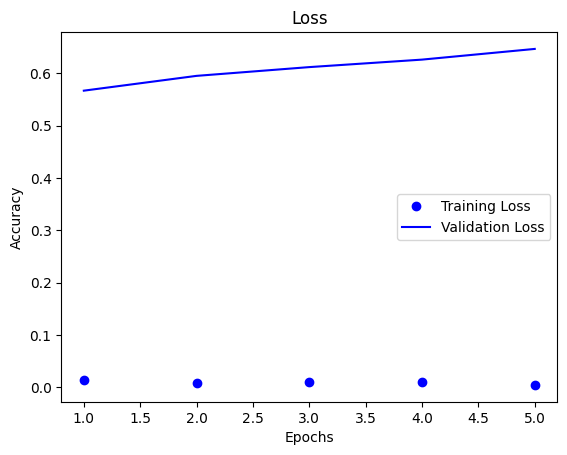

In [90]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,"bo",label="Training Loss")
plt.plot(epochs,val_loss_values,"b",label="Validation Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

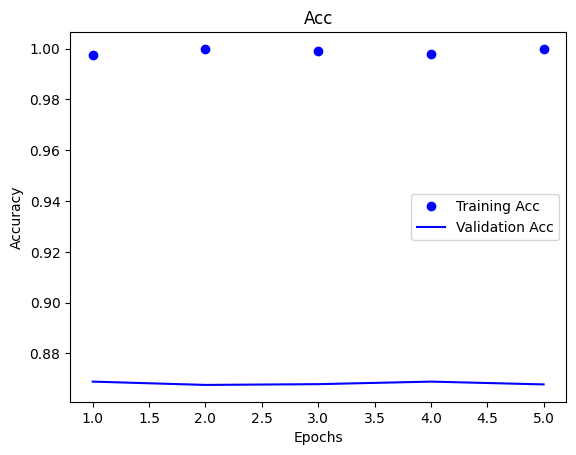

In [91]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs,acc,"bo",label="Training Acc")
plt.plot(epochs,val_acc,"b",label="Validation Acc")
plt.title("Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [92]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.6983 - accuracy: 0.8584


In [93]:
results

[0.6982554793357849, 0.8583999872207642]

In [94]:
#loss and #accuracy

In [95]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[1.1580064e-02],
       [9.9999952e-01],
       [8.9049739e-01],
       ...,
       [6.8344444e-04],
       [7.0541194e-03],
       [9.6025789e-01]], dtype=float32)

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
